# Fuzzy logic task

Define a fuzzy controller for a distance to stop information system for cars.

Also define the functions for each input, e. g. $$f_{light}(x) = min(2x, 1)$$
Write everything with Python code and visualize your results!
You can alternatively visualize it on paper.
Use center of gravity to calculate the final result.

The following information is provided:

## Inputs

### 1. Speed of vehicle
#### Set of terms
- slow
- medium
- fast


The terms are in range [0, 100]

### 2. (Own) Car weight

#### Set of terms
- light
- medium
- heavy

The terms are in range [0, 100]

## Output

### Distance to full stop

#### Set of terms
- very low
- low
- medium
- high
- very high 

The terms are in range [0, 3] ($\times$10meters)

## Inference rules

| Id 	| Speed 	| Car weight 	| Distance	|
|:---:	|:---:	|:---:	|:---:	|
| 1 	| slow 	| light 	| very low 	|
| 2 	| slow 	| medium 	| low 	|
| 3 	| slow 	| heavy 	| medium 	|
| 4 	| medium 	| light 	| low 	|
| 5 	| medium 	| medium 	| medium 	|
| 6 	| medium 	| heavy 	| high 	|
| 7 	| fast 	| light 	| medium 	|
| 8 	| fast 	| medium 	| high 	|
| 9 	| fast	| heavy 	| very high 	|

## Question

Calculate the distance to stop for

1) Speed = 30

2) Car weight = 60

# Possible solution

## Define functions for Input "Speed"

We let "slow" range from [0, 50]

We let "medium" range from [25, 75]

We let "fast" range from [50, 100]

$$ S_{slow}(x) =   \left\{
\begin{array}{ll}
      min(1, 2-\frac{x}{25}) & for\space x \leq 50 \\
      0 & else\\
\end{array} 
\right. $$

$$ S_{medium}(x) =   \left\{
\begin{array}{ll}
      max(0, -1+\frac{x}{25}) & for\space x \leq 50 \\
      max(0, 3-\frac{x}{25}) & for\space x > 50 \\
\end{array} 
\right. $$

$$ S_{fast}(x) =   \left\{
\begin{array}{ll}
      min(1, -2+\frac{x}{25}) & for x \geq 50 \\
      0 & else\\
\end{array} 
\right. $$

## Define functions for Input "Car weight"

We let "light" range from [0, 50]

We let "medium" range from [25, 75]

We let "heavy" range from [50, 100]

$$ C_{light} = S_{slow}$$

$$ C_{medium} = S_{medium}$$

$$ C_{heavy} = S_{fast}$$

## Define functions for Output "Distance"

We let "very low" range from [0,1]

We let "low" range from [0.5,1.5]

We let "medium" range from [1,2]

We let "high" range from [1.5,2.5]

We let "very high" range from [2,3]

$$ D_{vuc} = \left\{
\begin{array}{ll}
      min(1, 2-2x) & for\space x \leq 1 \\
      0 & else\\
\end{array} 
\right. $$

$$ D_{uc} = \left\{
\begin{array}{ll}
      max(0, 2x-1) & for\space x \leq 1\\
      max(0, 3-2x) & for\space x > 1\\
\end{array} 
\right. $$

$$ D_{m} = \left\{
\begin{array}{ll}
      max(0, 2x-2) & for\space x \leq 1.5\\
      max(0, 4-2x) & for\space x > 1.5\\
\end{array} 
\right. $$

$$ D_{c} = \left\{
\begin{array}{ll}
      max(0, 2x-3) & for\space x \leq 2\\
      max(0, 5-2x) & for\space x > 2\\
\end{array} 
\right. $$

$$ D_{vc} = \left\{
\begin{array}{ll}
      min(1, 2x-4) & for\space x \geq 2 \\
      0 & else\\
\end{array} 
\right. $$

## Lets visualize it using matplotlib
You probably need to install the package first

In [1]:
import matplotlib.pyplot as plt

In [2]:
speed_slow = lambda x: min(1, 2-x/25) if x <= 50 else 0
speed_medium = lambda x: max(0, -1+x/25) if x <= 50 else max(0, 3-x/25)
speed_fast = lambda x: min(1, -2+x/25) if x >= 50 else 0

In [3]:
output_vl = lambda x: min(1, 2*(1-x)) if x >= 0 else 1
output_l = lambda x: max(0, 2*x-1) if x <= 1 else max(0, 3-2*x)
output_m = lambda x: max(0, 2*x-2) if x <= 1.5 else max(0, 4-2*x)
output_h = lambda x: max(0, 2*x-3) if x <= 2 else max(0, 5-2*x)
output_vh = lambda x: min(1, 2*x-4) if x >= 2 else 0

#### Generate values for the defined functions

In [4]:
rules = {
    'slow_light': 'very_low',
    'slow_medium': 'low',
    'slow_heavy': 'medium',
    'medium_light': 'low',
    'medium_medium': 'medium',
    'medium_heavy': 'high',
    'fast_light': 'medium',
    'fast_medium': 'high',
    'fast_heavy': 'very_high'
}

rules_inf_fn = {
    'slow_light': output_vl,
    'slow_medium': output_l,
    'slow_heavy': output_m,
    'medium_light': output_l,
    'medium_medium': output_m,
    'medium_heavy': output_h,
    'fast_light': output_m,
    'fast_medium': output_h,
    'fast_heavy': output_vh
}

In [5]:
# distance fns
speed_slow_vals = [speed_slow(x) for x in range(0, 101)]
speed_medium_vals = [speed_medium(x) for x in range(0, 101)]
speed_fast_vals = [speed_fast(x) for x in range(0, 101)]

# car weight fns
car_weight_light_vals = [speed_slow(x) for x in range(0, 101)]
car_weight_medium_vals = [speed_medium(x) for x in range(0, 101)]
car_weight_heavy_vals = [speed_fast(x) for x in range(0, 101)]

# output fns
output_vl_vals = [output_vl(x/10) for x in range(0, 31)]
output_l_vals = [output_l(x/10) for x in range(0, 31)]
output_m_vals = [output_m(x/10) for x in range(0, 31)]
output_h_vals = [output_h(x/10) for x in range(0, 31)]
output_vh_vals = [output_vh(x/10) for x in range(0, 31)]

#### Plot them next to each other

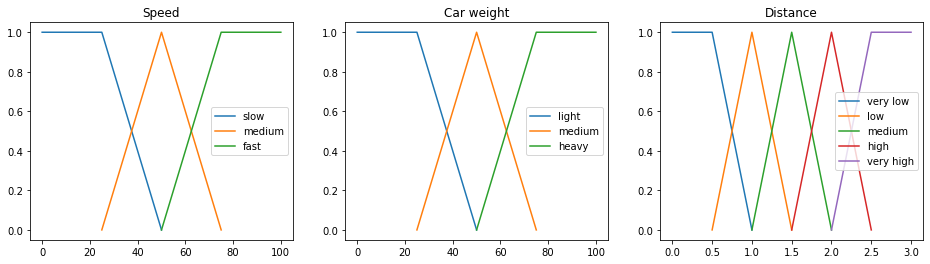

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,4))
# plot distances
ax1.set_title('Speed')
ax1.plot(list(range(0, 51)), speed_slow_vals[:51], label='slow')
ax1.plot(list(range(25, 76)), speed_medium_vals[25:76], label='medium')
ax1.plot(list(range(50, 101)), speed_fast_vals[50:], label='fast')
ax1.legend()

# plot car weights
ax2.set_title('Car weight')
ax2.plot(list(range(0, 51)), car_weight_light_vals[:51], label='light')
ax2.plot(list(range(25, 76)), car_weight_medium_vals[25:76], label='medium')
ax2.plot(list(range(50, 101)), car_weight_heavy_vals[50:], label='heavy')
ax2.legend()

# plot output distance
ax3.set_title('Distance')
ax3.plot([x/10 for x in range(0,11)], output_vl_vals[:11], label='very low')
ax3.plot([x/10 for x in range(5,16)], output_l_vals[5:16], label='low')
ax3.plot([x/10 for x in range(10,21)], output_m_vals[10:21], label='medium')
ax3.plot([x/10 for x in range(15,26)], output_h_vals[15:26], label='high')
ax3.plot([x/10 for x in range(20,31)], output_vh_vals[20:31], label='very high')
ax3.legend(loc='right')


plt.show()

## Calculate values

In [7]:
# which distance expression matches distance value x?
speed_val = 30
speeds = [('slow', speed_slow), ('medium', speed_medium), ('fast', speed_fast)]

# which car weight expression matches car weight value x?
car_weight_val = 60
car_weights = [('light', speed_slow), ('medium', speed_medium), ('heavy', speed_fast)]

In [8]:
inference_combinations = []
for speed in speeds:
    s_name = speed[0]
    s_val = speed[1](speed_val)
    if s_val <= 0.0:
        continue
    for weight in car_weights:
        w_name = weight[0]
        w_val = weight[1](car_weight_val)
        if w_val <= 0.0:
            continue
        # we use min function to apply a and combination for fuzzy controllers
        inference_combinations.append(('_'.join([s_name, w_name]), min(s_val, w_val)))

inference_combinations

[('slow_medium', 0.6000000000000001),
 ('slow_heavy', 0.3999999999999999),
 ('medium_medium', 0.19999999999999996),
 ('medium_heavy', 0.19999999999999996)]

## We now visualize again what we want to use for our calculation of the final result

In [9]:
# calculate the center of gravity (numerically)
def center_of_gravity(args):
    '''
    param args: list of tuples with 1) lookup value and 2) function to calc y
    '''
    nominator = sum([tup[0]*tup[1] for tup in args])
    denominator = sum([tup[1] for tup in args])

    return nominator / denominator

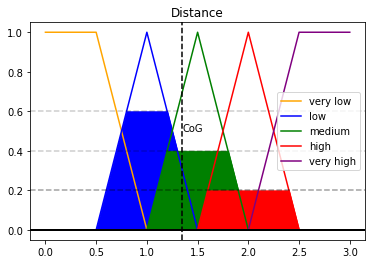

1.3472222222222217


In [14]:
colors = {'very_low': 'orange', 'low': 'blue', 'medium': 'green', 'high': 'red', 'very_high': 'purple'}

plt.title('Distance')
plt.plot([x/10 for x in range(0,11)], output_vl_vals[:11], label='very low', color=colors['very_low'])
plt.plot([x/10 for x in range(5,16)], output_l_vals[5:16], label='low', color=colors['low'])
plt.plot([x/10 for x in range(10,21)], output_m_vals[10:21], label='medium', color=colors['medium'])
plt.plot([x/10 for x in range(15,26)], output_h_vals[15:26], label='high', color=colors['high'])
plt.plot([x/10 for x in range(20,31)], output_vh_vals[20:31], label='very high', color=colors['very_high'])

plt.legend(loc='right')

# center of gravity
x_vals = [x/10 for x in range(0, 31)]
center_og_y_vals = []
for inf_comb in inference_combinations:
    comb_name = inf_comb[0]
    h_val = inf_comb[1]
    plt.axhline(y=h_val, color='black', linestyle='dashed', alpha=0.2)
    
    # use inference fn
    inf_fn = rules_inf_fn[comb_name]
    rule_result = rules[comb_name]
    color = colors[rule_result]
    y_vals = [min(h_val, inf_fn(x/10)) for x in range(0, 31)]
    plt.fill_between(x_vals, y_vals, color=color)
    
    # add all at first
    center_og_y_vals.append(y_vals)
    
    plt.axhline(y=0, color='black')
    
# use the center og values and always calculate the max y at the x positions (shape of the area)
only_y_max_vals = []
cog_tups = []
for i, x in enumerate(x_vals):
    y_max = max([center_og_y_vals[l][i] for l in range(0, len(center_og_y_vals))])
    
    cog_tups.append((x, y_max))

# plot the center of gravity vertical line
cog_val = center_of_gravity(cog_tups)
plt.axvline(x=cog_val, color='black', linestyle='dashed')
plt.text(x=cog_val, y=0.5, s='CoG')

plt.show()
print(cog_val)